In [10]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
DATA_PATH = Path("../data/samples.json")

with DATA_PATH.open(encoding="utf-8") as f:
    samples = json.load(f)

len(samples)

48

In [12]:
df = pd.DataFrame(samples)
df.head()

,id,source,task,text,context,question,answer,stats
0,KLUE-MRC-2848,KLUE-MRC,mrc,"한독(대표이사 김영진, 백진기)과 대한약학회(회장 이용복)가 공동 제정한 제51회 ...","한독(대표이사 김영진, 백진기)과 대한약학회(회장 이용복)가 공동 제정한 제51회 ...",서영준 교수가 인정받게 된 배경이 되는 논문은 몇 년도에 공개되었는가?,1996,"{'n_sentences': 7, 'n_chars': 695}"
1,KLUE-MRC-3358,KLUE-MRC,mrc,성 접대 의혹에 연루된 것으로 알려진 김학의 전 법무부 차관의 출국금지 신청이 기각...,성 접대 의혹에 연루된 것으로 알려진 김학의 전 법무부 차관의 출국금지 신청이 기각...,김학의가 현재 근무하는 정부 부처는?,법무부,"{'n_sentences': 10, 'n_chars': 703}"
2,SQuAD-8675,SQuAD,mrc,Whitehead did not begin his career as a philos...,Whitehead did not begin his career as a philos...,What did Whitehead consider himself as a philo...,rank amateur,"{'n_sentences': 4, 'n_chars': 681}"
3,KLUE-MRC-3070,KLUE-MRC,mrc,세계보건기구(WHO)가 8일 서아프리카에서 확산 중인 에볼라 바이러스를 막기 위해 ...,세계보건기구(WHO)가 8일 서아프리카에서 확산 중인 에볼라 바이러스를 막기 위해 ...,"2009년, WHO가 최초로 비상사태를 선포한 이유가 된 바이러스는?",신종플루,"{'n_sentences': 7, 'n_chars': 559}"
4,KLUE-MRC-5094,KLUE-MRC,mrc,엔카닷컴(대표 김상범)은 내차팔기 서비스 ‘엔카 비교견적’에 ‘실시간 견적’을 도입...,엔카닷컴(대표 김상범)은 내차팔기 서비스 ‘엔카 비교견적’에 ‘실시간 견적’을 도입...,엔카 닷컴의 조사에서 선호하는 차 판매 방식 1위를 차지한 것은?,‘중고차 거래 앱/사이트’,"{'n_sentences': 9, 'n_chars': 600}"


In [13]:
df["source"].value_counts()

source
KLUE-MRC    30
SQuAD       18
Name: count, dtype: int64

In [14]:
df["text_length"] = df["text"].apply(len)
df["text_length"].describe()

count      48.000000
mean      854.458333
std       337.476238
min       437.000000
25%       616.500000
50%       742.500000
75%      1010.250000
max      1777.000000
Name: text_length, dtype: float64

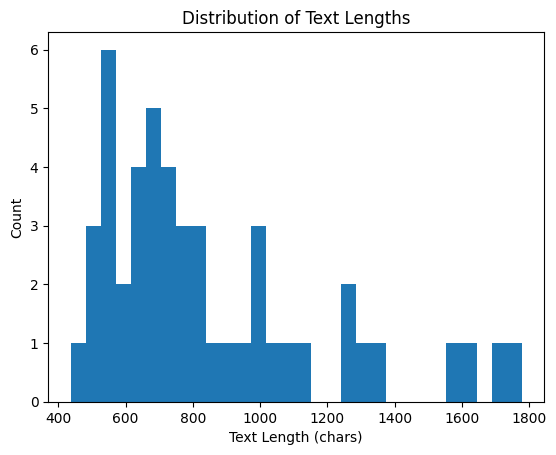

In [6]:
plt.hist(df["text_length"], bins=30)
plt.xlabel("Text Length (chars)")
plt.ylabel("Count")
plt.title("Distribution of Text Lengths")
plt.show()

In [15]:
df["n_sentences"] = df["stats"].apply(lambda x: x["n_sentences"])
df["n_sentences"].describe()

count    48.000000
mean     10.541667
std       6.610624
min       3.000000
25%       4.000000
50%       8.500000
75%      14.500000
max      28.000000
Name: n_sentences, dtype: float64

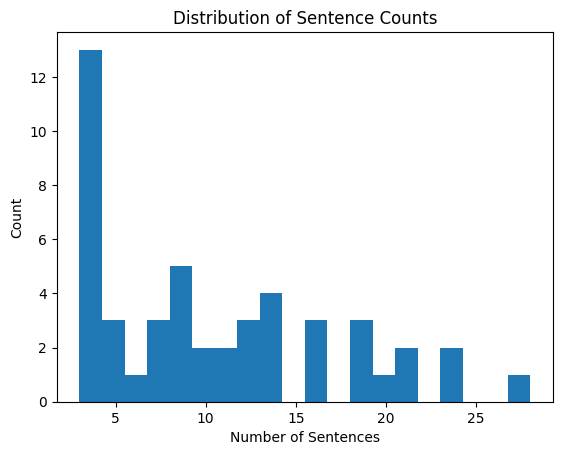

In [8]:
plt.hist(df["n_sentences"], bins=20)
plt.xlabel("Number of Sentences")
plt.ylabel("Count")
plt.title("Distribution of Sentence Counts")
plt.show()

In [16]:
df[df["text_length"] < 200][["id", "text_length"]].head()

,id,text_length
